In [2]:
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import numpy as np

In [4]:
from IPython.display import display as ipydisplay, Image, clear_output, HTML
# for interacting with the notebook better

In [5]:
import time


### Fix colour channel ordering for plotting
Matplotlib and OpenCV order colour channels in image matricies slightly differently, RGB and BGR respectively. We need to reorder the colour channels if we want to plot OpenCV images with Matplotlib.


In [4]:

def bgrtorgb(image):
    return cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

def show_image(name):
    """
    Showing image files.
    """
    ipydisplay(Image(name))

def plot_image(image, figsize=(5,5), recolour=False):
    """
    Plotting image matricies.
    """
    if recolour: image = bgrtorgb(image)
    plt.figure(figsize=figsize)
    if image.shape[-1] == 3:
        plt.imshow(image)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

    elif image.shape[-1] == 1 or len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()
    else:
        raise Exception("Image has invalid shape.")

### LOAD AND SHOW IMAGES

In [36]:
#videos are frames per second 
img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_GRAYSCALE)

# second parameter is filter

In [37]:
img1 = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_UNCHANGED)

#CAN BE READ AS NUMBERS 
# GRAYSCALE 0
# COLOR 1 
# UNCHANGED -1

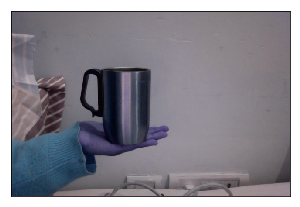

In [38]:
#Actual Picture
plot_image(img1)

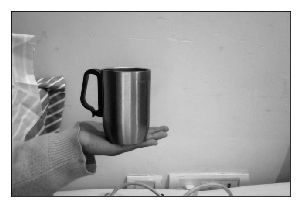

In [39]:
#read an image in opencv

#cv2.imshow('grayscale',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#save an image in opencv

#cv2.imwrite('mug_modified.jpg',img)

plot_image(img)

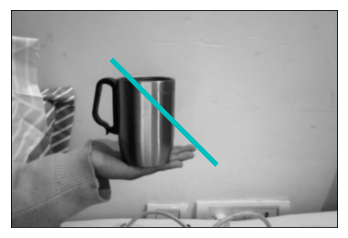

In [40]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()


### LOAD VIDEO FROM A WEBCAM FEED

In [ ]:
#get the webcam started
cap = cv2.VideoCapture(1)

#Save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(True):
    
    ret, frame = cap.read()
    # ret is a boolean regarding whether or not there was a frame returned or not. If no frame then "None"
    
    if ret: 
        #OpenCV reads colors as BGR (Blue Green Red)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
        #save the image
        out.write(frame)
        
        # Display the resulting frame
        cv2.imshow('frame',gray)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



In [ ]:
cap.release()
out.release()
cv2.destroyAllWindows()

In [14]:
# load a video file

video = cv2.VideoCapture('/Users/simra/Documents/Personality/training80_01/VIDEO/-AmMDnVl4s8.003.mp4')

while True:
    # Read a new frame
    success, frame = video.read()
    if not success:
        print("Frame not successfully read from video capture")
        break
        
    # Display result
    cv2.imshow("frame", frame)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27:# escape pressed 
        break
    elif k == 115: # s pressed
        fname = input("File name")
        cv2.imwrite(os.path.join(IMAGES_FOLDER, '{}.jpg'.format(fname)), frame)
        
cv2.destroyAllWindows()
video.release()

Frame not successfully read from video capture


### Drawing & Writing on images 

In [42]:
img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_GRAYSCALE)


cv2.line(img, (0,0), (150,150), (255,255,255), 15)

# from (0,0) to (150,150) 

# blue - 255,0,0
# green - 0,255,0
# red - 0,0,255
# white - 255, 255, 255
# black - 0,0,0

# 15 pixels is line width


#cv2.imshow("image",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


cv2.imwrite('mug_1.jpg',img)

True

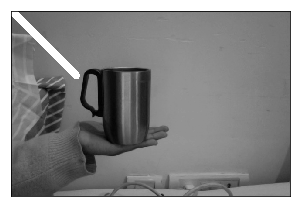

In [43]:
plot_image(img)

In [44]:
img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_GRAYSCALE)

cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)

cv2.imwrite('mug_2.jpg',img)

True

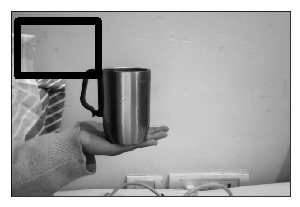

In [45]:
plot_image(img)

In [46]:
img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_COLOR)


cv2.circle(img,(100,63), 55, (0,255,0), -1)
# image, center of the circle, radius, color, fill 
#-1 means fill in the circle


cv2.imwrite('mug_3.jpg',img)

True

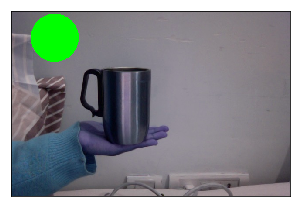

In [47]:
plot_image(img)

In [48]:
#Pentagons: 
img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_COLOR)
    
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)

cv2.polylines(img, [pts], True, (0,255,255), 3)

cv2.imwrite('mug_4.jpg',img)

True

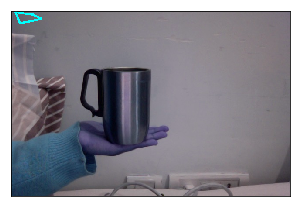

In [49]:
plot_image(img)

In [50]:
#Write on the image: 
img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/mug.jpg', cv2.IMREAD_COLOR)

font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,'Simraa!',(0,130), font, 1, (200,255,155), 2, cv2.LINE_AA)

cv2.imwrite('mug_5.jpg',img)

True

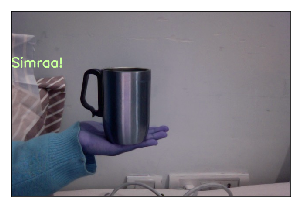

In [51]:
plot_image(img)

##### The colors are like this because I am using matplotlib to show the images bcs for the green-bluish pictures I have used GRAYSCALE Filter

### Image Operations 

In [52]:
px = img[55,55]
px

array([110, 108, 114], dtype=uint8)

In [53]:
img[55,55]= [255,255,255]

In [54]:
px = img[55,55]
px

array([255, 255, 255], dtype=uint8)

converted to a white pixel

In [55]:
#Region of Image (Roi)

roi  = img[100:150, 100:150]
roi

array([[[123, 118, 127],
        [123, 118, 127],
        [123, 119, 125],
        ...,
        [125, 122, 131],
        [125, 122, 131],
        [125, 122, 131]],

       [[123, 118, 127],
        [123, 118, 127],
        [123, 119, 125],
        ...,
        [125, 122, 131],
        [124, 121, 130],
        [125, 122, 131]],

       [[123, 118, 127],
        [123, 118, 127],
        [123, 119, 125],
        ...,
        [125, 122, 131],
        [124, 121, 130],
        [125, 122, 131]],

       ...,

       [[120, 117, 126],
        [121, 118, 127],
        [121, 118, 127],
        ...,
        [126, 123, 132],
        [127, 124, 133],
        [127, 124, 133]],

       [[120, 118, 124],
        [120, 118, 124],
        [120, 118, 124],
        ...,
        [126, 123, 132],
        [127, 124, 133],
        [128, 125, 134]],

       [[121, 117, 123],
        [119, 117, 123],
        [121, 117, 123],
        ...,
        [126, 123, 132],
        [127, 124, 133],
        [127, 124, 133]]

Pixel values for the given region

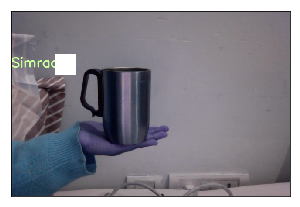

In [56]:
img[100:150, 100:150]=[255,255,255]
plot_image(img)

### Image arthimetic and logic

In [57]:
img  = cv2.imread('/Users/simra/Downloads/1.png', cv2.IMREAD_COLOR)
img1 = cv2.imread('/Users/simra/Downloads/2.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('/Users/simra/Downloads/3.png', cv2.IMREAD_COLOR)


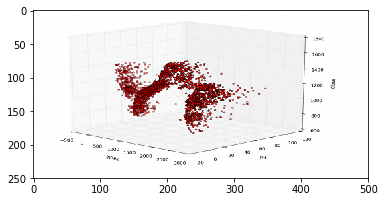

In [58]:
plt.imshow(img)

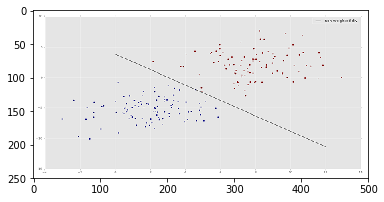

In [59]:
plt.imshow(img1)

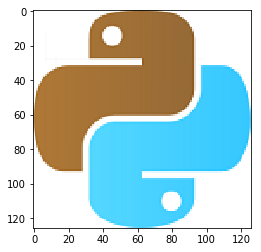

In [60]:
plt.imshow(img2)

### ADD

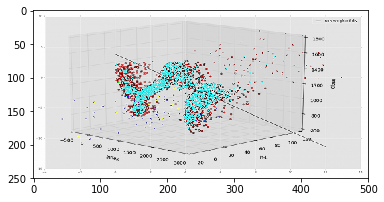

In [24]:
add = img+img1

plt.imshow(add)

neither lost its opaqueness

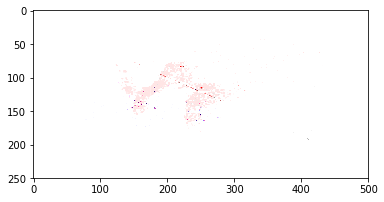

In [26]:
add = cv2.add(img, img1)
plt.imshow(add)

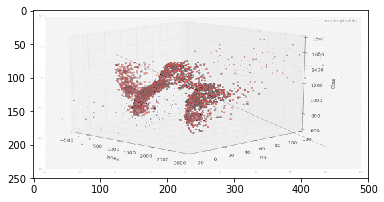

In [27]:
#Using weigths
weighted = cv2.addWeighted(img, 0.6, img1, 0.4, 0)
plt.imshow(weighted)

Degree to opaqueness 0.6, 0.4

### LOGICAL OPERATIONS

In [50]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img[0:rows, 0:cols ]

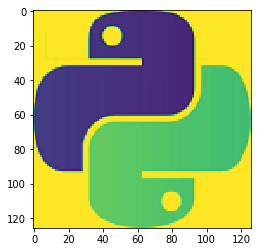

In [62]:
# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

plt.imshow(img2gray)

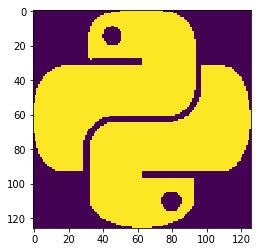

In [36]:
# add a threshold
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
#220 - Threshold
#If pixel value is above 220 it is converted to 255 and if it is below then 0(black)
plt.imshow(mask)

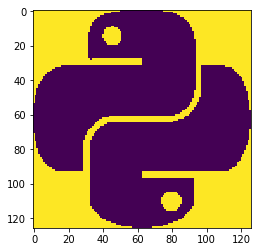

In [37]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv)

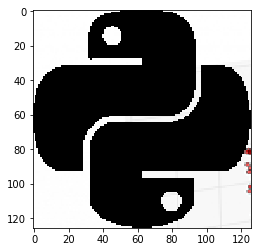

In [38]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg)

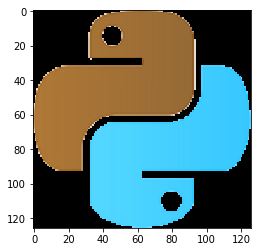

In [33]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(img2_fg)

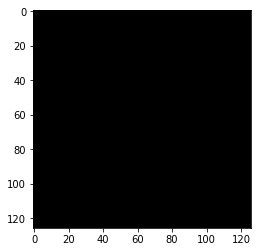

In [42]:
mask_1 = cv2.bitwise_xor(img2,img2,mask = mask_inv)
plt.imshow(mask_1)

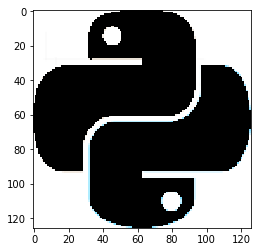

In [45]:
mask_2 = cv2.bitwise_or(img2,img2,mask = mask_inv)
plt.imshow(mask_2)

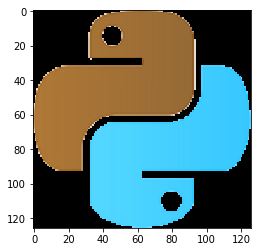

In [44]:
mask_3 = cv2.bitwise_or(img2,img2,mask = mask)
plt.imshow(mask_3)

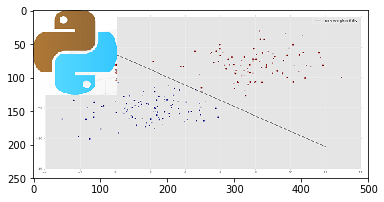

In [59]:
img_bg = cv2.bitwise_and(roi,roi, mask= mask_inv)
img_fg = cv2.bitwise_and(img2,img2, mask= mask)

dst = cv2.add(img_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)

### Thresholds on Harry Potter Chapter

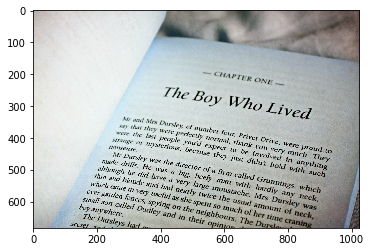

In [69]:
img = cv2.imread('/Users/simra/Downloads/boy.jpg')
plt.imshow(img)

In [79]:
retval, threshold = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)

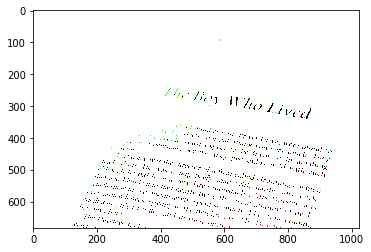

In [80]:
plt.imshow(threshold)


threshold is 20. Pixel value above threshold is white and below is black.

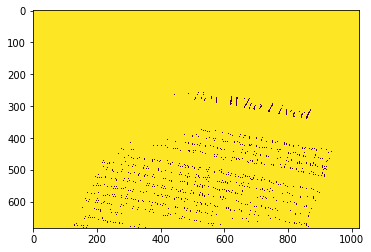

In [75]:
#color image is ocnverted to bgr2gray
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)


threshold is 10. Pixel value above threshold is white and below is black.

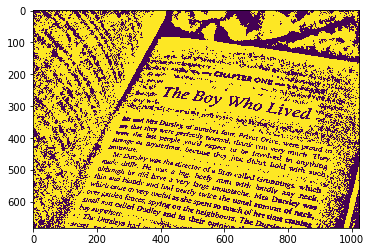

In [76]:
# use grayscaled image 

# gaussian adaptive threshold. 
# Type of threshold - cv2.ADAPTIVE_THRESH_GAUSSIAN_C
th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
plt.imshow(th)


This is easier to read.

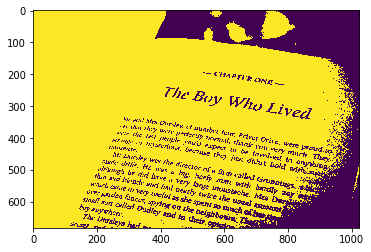

In [82]:
#OTSU THRESHOLD.
retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(threshold2)


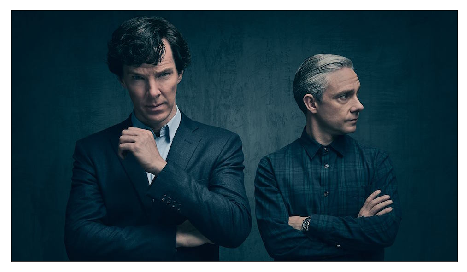

In [63]:
sherlock_img = cv2.imread('/Users/simra/Downloads/Sherlock.jpg')
sherlock_img = cv2.cvtColor(sherlock_img, cv2.COLOR_BGR2RGB)
plot_image(sherlock_img)

In [66]:
print('Image Shape: ', sherlock_img.shape, '\n\n')
print('Image Matrix: \n', sherlock_img, '\n\n')


Image Shape:  (545, 970, 3) 


Image Matrix: 
 [[[ 0 21 34]
  [ 0 21 34]
  [ 0 21 34]
  ...
  [ 0 28 40]
  [ 0 28 40]
  [ 0 28 40]]

 [[ 0 21 34]
  [ 0 21 34]
  [ 0 21 34]
  ...
  [ 0 28 40]
  [ 0 28 40]
  [ 0 28 40]]

 [[ 0 21 34]
  [ 0 21 34]
  [ 0 21 34]
  ...
  [ 0 28 40]
  [ 1 29 41]
  [ 1 29 41]]

 ...

 [[ 0 26 39]
  [ 0 26 39]
  [ 0 26 39]
  ...
  [ 1 29 41]
  [ 1 29 41]
  [ 1 29 41]]

 [[ 0 26 39]
  [ 0 26 39]
  [ 0 26 39]
  ...
  [ 1 29 41]
  [ 1 29 41]
  [ 1 29 41]]

 [[ 0 26 39]
  [ 0 26 39]
  [ 0 26 39]
  ...
  [ 0 30 41]
  [ 1 29 41]
  [ 1 29 41]]] 




### Blurring
Blurring is useful when there is noise in an image you want to remove.


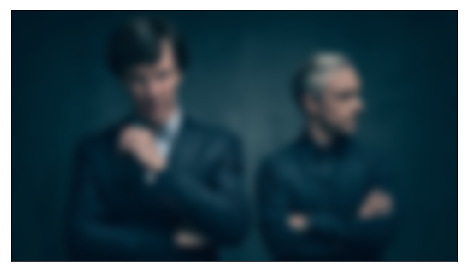

In [74]:
blur_img = sherlock_img.copy()
blur_img = cv2.GaussianBlur(blur_img, (41,41), 10)
plot_image(blur_img)

### Dilating
Dilation, as it sounds, dilates pixel neighbourhoods by finding maximums over the image by the kernel size given. This is useful for expanding selections.

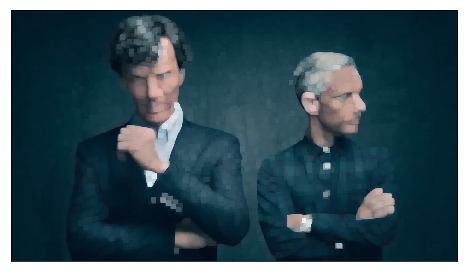

In [76]:
dilate_img = sherlock_img.copy()
dilate_img = cv2.dilate(sherlock_img, np.ones((10,10), dtype=np.uint8), iterations=1)
plot_image(dilate_img)

### Erosion
Erosion is the opposite of dilation, useful for remove noise.

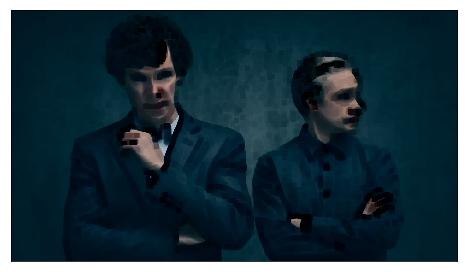

In [79]:
erosion_img = sherlock_img.copy()
erosion_img = cv2.erode(erosion_img, np.ones((10,10), dtype=np.uint8), iterations=1)
plot_image(erosion_img)

### Canny edge detector


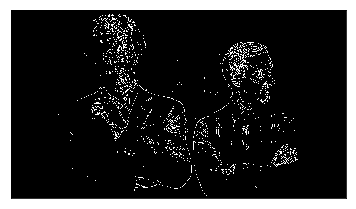

In [83]:
canny_img = sherlock_img.copy()
#canny_img = cv2.erode(canny_img, np.ones((8,8), dtype=np.uint8), iterations=1)
edges = cv2.Canny(canny_img,100,100)
plt.imshow(edges.astype(np.uint8), cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

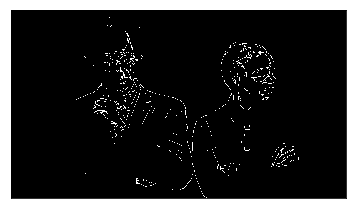

In [84]:
canny_img = sherlock_img.copy()
canny_img = cv2.erode(canny_img, np.ones((8,8), dtype=np.uint8), iterations=1)
edges = cv2.Canny(canny_img,100,100)
plt.imshow(edges.astype(np.uint8), cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [85]:
#EROSION IS REMOVING NOISE

### Thresholding

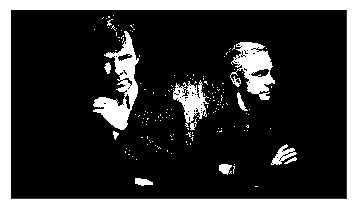

(545, 970)


In [82]:
thresh_img = sherlock_img.copy()
thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(thresh_img, 80, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(thresh.shape)

### Background Subtraction Techniques


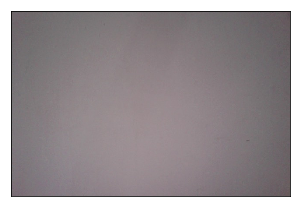

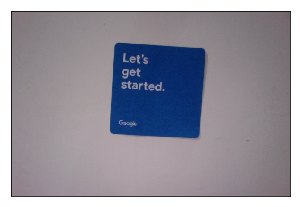

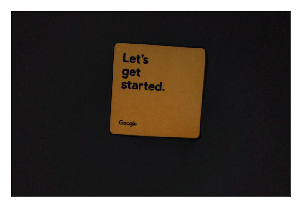

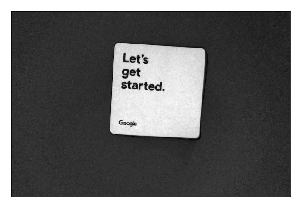

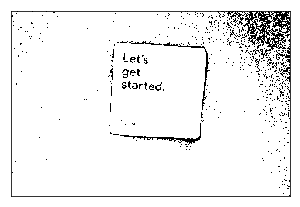

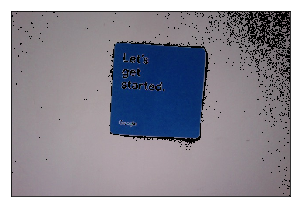

In [91]:
img_bg = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/bg.jpg', cv2.IMREAD_COLOR)
img_fg = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/image.jpg', cv2.IMREAD_COLOR)



diff = cv2.absdiff(img_bg, img_fg)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
th, mask_thresh = cv2.threshold(mask, 15, 255, cv2.THRESH_BINARY)

mask_indexes = mask_thresh > 0

foreground = np.zeros_like(img_fg, dtype=np.uint8)
for i, row in enumerate(mask_indexes):
    
    foreground[i, row] = img_fg[i, row]

plot_image(img_bg, recolour=True)
plot_image(img_fg, recolour=True)
plot_image(diff, recolour=True)
plot_image(mask)
plot_image(mask_thresh)
plot_image(foreground, recolour=True)



## Using motion based background subtraction algorithms (mainly video)¶


These algorithms are most used for video. The algorithm looks at a series of frames and computes which pixels are most static and identifies the foreground by the pixels that are moving. The MOG2 and KNN background subtractors are two different algorithms.


In [98]:
import time
ERODE = True

fgbg = cv2.createBackgroundSubtractorMOG2()
# fgbg = cv2.createBackgroundSubtractorKNN()

video = cv2.VideoCapture('/Users/simra/Documents/Personality/training80_01/VIDEO/-AmMDnVl4s8.003.mp4')

while True:
    time.sleep(0.025)
    
    timer = cv2.getTickCount()
    
    # Read a new frame
    success, frame = video.read()
    if not success:
        # Frame not successfully read from video capture
        break
        
    fgmask = fgbg.apply(frame)
    
    # Apply erosion to clean up noise
    if ERODE:
        fgmask = cv2.erode(fgmask, np.ones((3,3), dtype=np.uint8), iterations=1)
    
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    # Display FPS on frame
    cv2.putText(fgmask, "FPS : " + str(int(fps)), (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
 
    # Display result
    cv2.imshow("fgmask", fgmask)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break #
        
cv2.destroyAllWindows()
video.release()

In [8]:
ERODE = True

fgbg = cv2.createBackgroundSubtractorKNN()

video = cv2.VideoCapture('/Users/simra/Documents/Personality/training80_01/VIDEO/-AmMDnVl4s8.003.mp4')

while True:
    time.sleep(0.025)
    
    timer = cv2.getTickCount()
    
    # Read a new frame
    success, frame = video.read()
    if not success:
        # Frame not successfully read from video capture
        break
        
    fgmask = fgbg.apply(frame)
    
    # Apply erosion to clean up noise
    if ERODE:
        fgmask = cv2.erode(fgmask, np.ones((3,3), dtype=np.uint8), iterations=1)
    
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    # Display FPS on frame
    cv2.putText(fgmask, "FPS : " + str(int(fps)), (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
 
    # Display result
    cv2.imshow("fgmask", fgmask)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break #
        
cv2.destroyAllWindows()
video.release()

# Contours

Finding contours is done by finding points or corners in an image and connecting those that have the same color or intensity.

Finding contours and sorting contours
Here we sort the contours by area and get the 4 largest contours, but we can also find all contours that are greater than a certain size. We can also fill contours by passing -1 to the last parameter of cv2.drawContours().

You can also use contours for masking similar to how it was done above for background subtraction.

Contours is Finding BOUNDARIES

In [ ]:
OUTLINE = True
LRG_ONLY = True

# window to hold the trackbar
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbar
cv2.createTrackbar('Thresh', 'image', 0, 255, lambda x: None)

lets_img = cv2.imread('/Users/simra/Pictures/Photo Booth Library/Pictures/image.jpg')

while True:
    thresh_min = cv2.getTrackbarPos('Thresh','image')
    
    contour_img = lets_img.copy()
    contour_img = cv2.cvtColor(contour_img, cv2.COLOR_BGR2GRAY)
    ret, contour_img_thresh = cv2.threshold(contour_img, thresh_min, 255, 0)
    im2, contours, hierarchy = cv2.findContours(contour_img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if LRG_ONLY:
        cnts = [x for x in contours if cv2.contourArea(x) > 20000]
    else:
        cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:3]

    if OUTLINE:
        # Draw only outlines
        contour_img_display = cv2.drawContours(lets_img.copy(), cnts, -1, (238, 255, 0), 2)
    else:
        # Draw filled contours
        contour_img_display = cv2.drawContours(lets_img.copy(), cnts, -1, (238, 255, 0), -1)

    contour_img_display = cv2.cvtColor(contour_img_display, cv2.COLOR_BGR2RGB)
    
    cv2.imshow('image', contour_img_display)
    cv2.imshow('thresh', contour_img_thresh)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break # ESC pressed
        

cv2.destroyAllWindows()    



 OUTPUT - WE CAN CHNAGE THE THRESHOLD VIA A SCROLL BAR AND ANALYSE BOTH THE IMAGES.

### Tracking
Tracking is a very complex topic and we will simply use OpenCV's tracking algorithms to track objects. For this tutorial, we will use the Kernelized Correlation Filters (KCF) tracking as it performs well and provides built in tracking error detection.

Available tracking algorithms:

- MIL
- BOOSTING
- MEDIANFLOW
- TLD
- KCF

In [6]:
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
print('OpenCV Version: {}.{}.{}'.format(major_ver, minor_ver, subminor_ver))

OpenCV Version: 3.3.0


In [7]:
minor_ver

'3'

In [8]:
from imutils.video import VideoStream
from imutils.video import FPS

In [9]:
# Set up tracker.
def setup_tracker(ttype):
    tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'GOTURN']
    tracker_type = tracker_types[ttype]

    if int(major_ver) == 3 and int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'GOTURN':
            tracker = cv2.TrackerGOTURN_create()
        
    return tracker

video = cv2.VideoCapture('/Users/simra/Documents/Personality/training80_01/VIDEO/-AmMDnVl4s8.003.mp4')
# Read first frame
success, frame = video.read()
if not success:
    print("first frame not read")
    sys.exit()

tracker = setup_tracker(4)

In [10]:


# Select roi for bbox
bbox = cv2.selectROI(frame, False)
cv2.destroyAllWindows()

# Initialize tracker with first frame and bounding box
tracking_success = tracker.init(frame, bbox)

while True:
    time.sleep(0.02)
    
    timer = cv2.getTickCount()
    
    # Read a new frame
    success, frame = video.read()
    if not success:
        # Frame not successfully read from video capture
        break
        
    # Update tracker
    tracking_success, bbox = tracker.update(frame)
    
    # Draw bounding box
    if tracking_success:
        # Tracking success
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)        
    else:
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        
    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    # Display FPS on frame
    cv2.putText(frame, "FPS : " + str(int(fps)), (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
    
    # Display result
    cv2.imshow("frame", frame)
    
    k = cv2.waitKey(1) & 0xff
    if k == 27: break # ESC pressed
        
cv2.destroyAllWindows()
video.release()

displays "FPS" and shows the text tracking failure detected